In [1]:
%matplotlib inline
import matplotlib.pyplot as plt

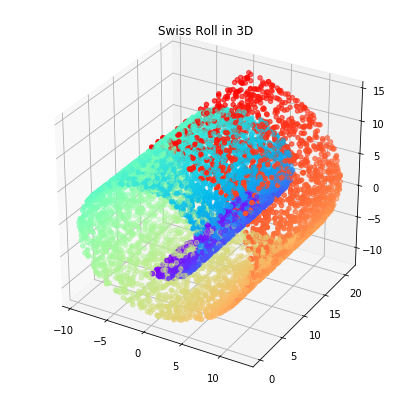

In [2]:
from sklearn.datasets.samples_generator import make_swiss_roll
from mpl_toolkits.mplot3d import Axes3D

X, color = make_swiss_roll(n_samples=8000, random_state=123)

fig = plt.figure(figsize=(7,7))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=color, cmap=plt.cm.rainbow)
plt.title('Swiss Roll in 3D')
plt.show()

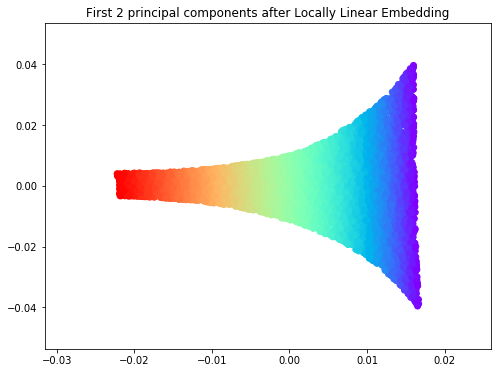

In [3]:
from sklearn.manifold import locally_linear_embedding

X_lle, err = locally_linear_embedding(X, n_neighbors=12, n_components=2)

plt.figure(figsize=(8,6))
plt.scatter(X_lle[:, 0], X_lle[:, 1], c=color, cmap=plt.cm.rainbow)

plt.title('First 2 principal components after Locally Linear Embedding')
plt.show()

Automatically created module for IPython interactive environment
Computing LLE embedding
Done. Reconstruction error: 1.24523e-07


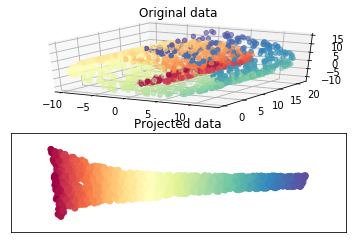

In [3]:
print(__doc__)

import matplotlib.pyplot as plt

# This import is needed to modify the way figure behaves
from mpl_toolkits.mplot3d import Axes3D
Axes3D

#----------------------------------------------------------------------
# Locally linear embedding of the swiss roll

from sklearn import manifold, datasets
X, color = datasets.make_swiss_roll(n_samples=1500)

print("Computing LLE embedding")
X_r, err = manifold.locally_linear_embedding(X, n_neighbors=12,
                                             n_components=2)
print("Done. Reconstruction error: %g" % err)

#----------------------------------------------------------------------
# Plot result

fig = plt.figure()

ax = fig.add_subplot(211, projection='3d')
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=color, cmap=plt.cm.Spectral)

ax.set_title("Original data")
ax = fig.add_subplot(212)
ax.scatter(X_r[:, 0], X_r[:, 1], c=color, cmap=plt.cm.Spectral)
plt.axis('tight')
plt.xticks([]), plt.yticks([])
plt.title('Projected data')
plt.show()

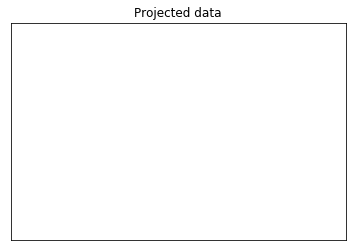

In [1]:

def LLE(data, n_components=2, n_neighbors=6):
    """
    Dimensionality reduction with FastLLE algorithm
    :param data: input image matrix of shape (n,m)
    :param n_components: number of components for projection
    :param n_neighbors: number of neighbors for the weight extraction
    :return: Projected output of shape (n_components, n)
    """
    # Compute the nearest neighbors
    _, neighbors_idx = distance_mat(data, n_neighbors)

    n = data.shape[0]
    w = np.zeros((n, n))
    for i in range(n):
        # Center the neighbors matrix
        k_indexes = neighbors_idx[i, :]
        neighbors = data[k_indexes, :] - data[i, :]

        # Compute the corresponding gram matrix
        gram_inv = np.linalg.pinv(np.dot(neighbors, neighbors.T))

        # Setting the weight values according to the lagrangian
        lambda_par = 2/np.sum(gram_inv)
        w[i, k_indexes] = lambda_par*np.sum(gram_inv, axis=1)/2
    m = np.subtract(np.eye(n), w)
    values, u = np.linalg.eigh(np.dot(np.transpose(m), m))
    return u[:, 1:n_components+1]